In [4]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
from matplotlib import offsetbox
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
digits = load_digits()

X_digits = digits.data

# campioni: 1797
# dimens.:    64 (immagine 8x8)

y_digits = digits.target

# classi:     10 (le cifre da 0 a 9)+

In [3]:
digits_df = pd.DataFrame(X_digits)
digits_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


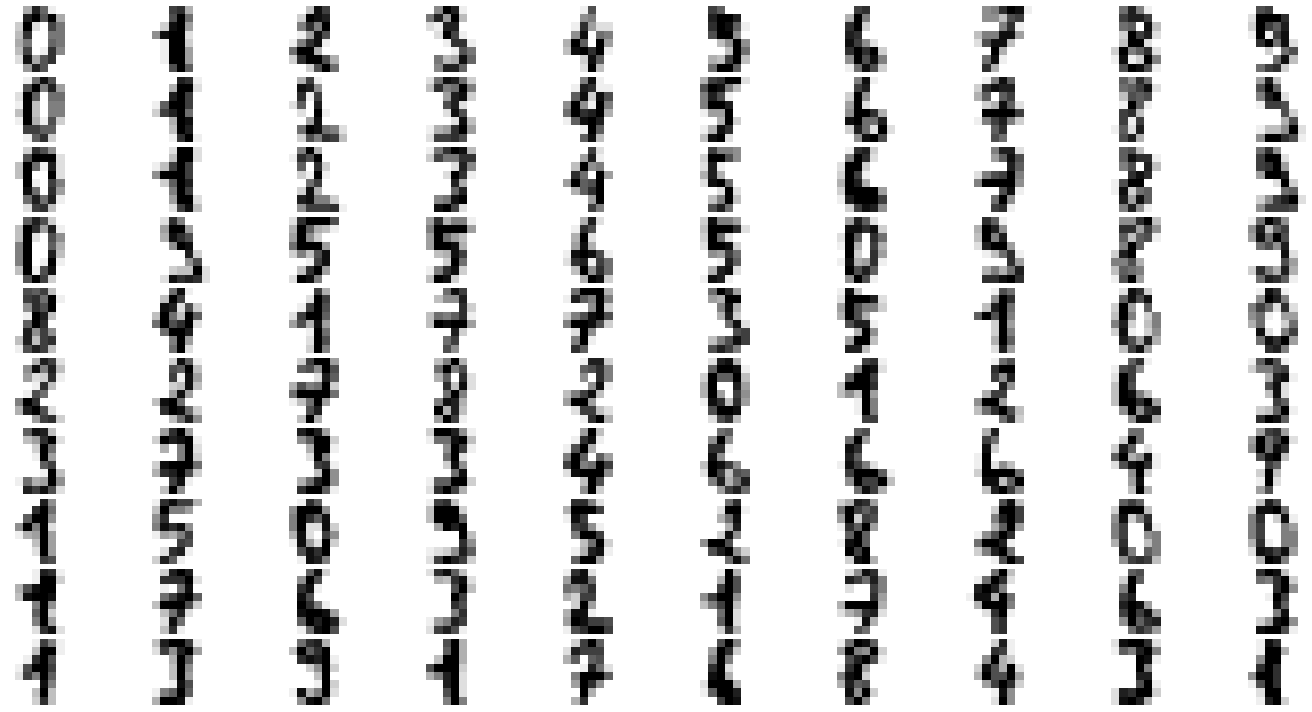

In [4]:
# mostro qualche cifra nel dataset (100)

matplotlib.rcParams['figure.figsize'] = [20, 10]

fig, ax_array = plt.subplots(10, 10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap=plt.cm.binary)

plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [6]:
def disegna_1(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 15})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            # per avere il quadratino con il numero
            # ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    plt.title("LLE", fontsize=24);


def disegna_2(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(title, fontsize=24);

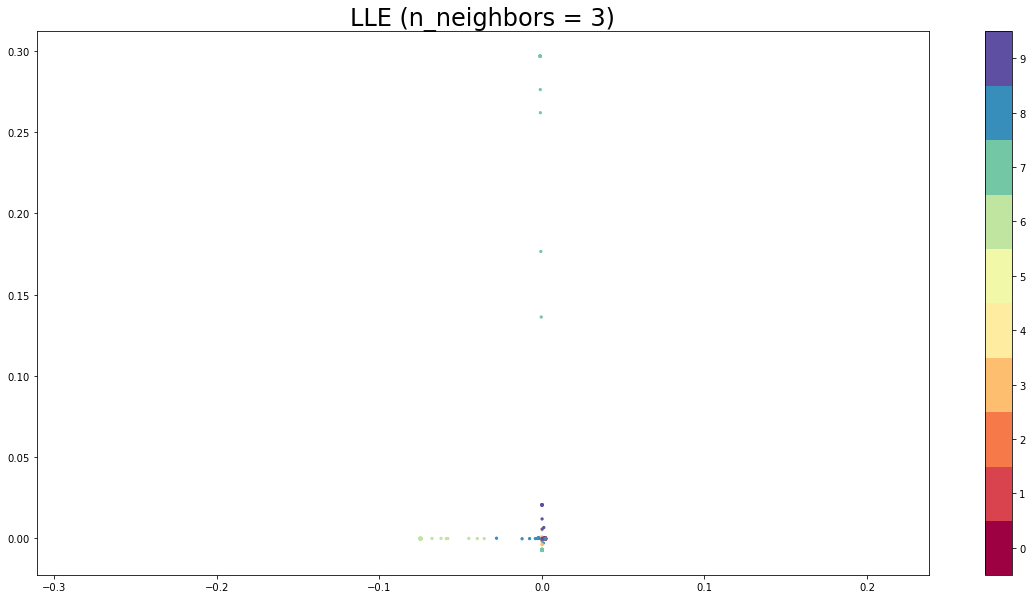

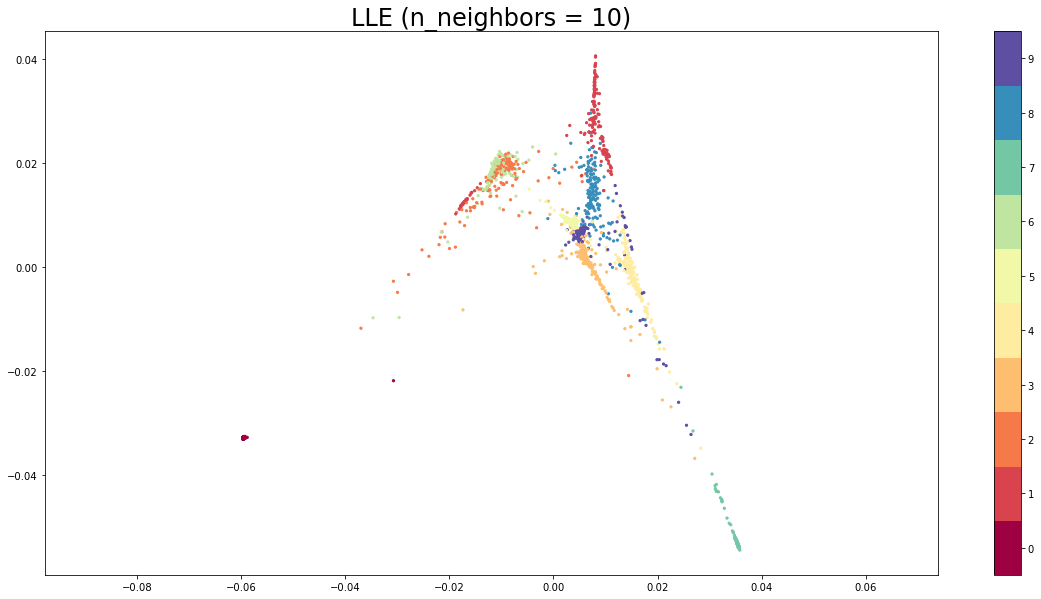

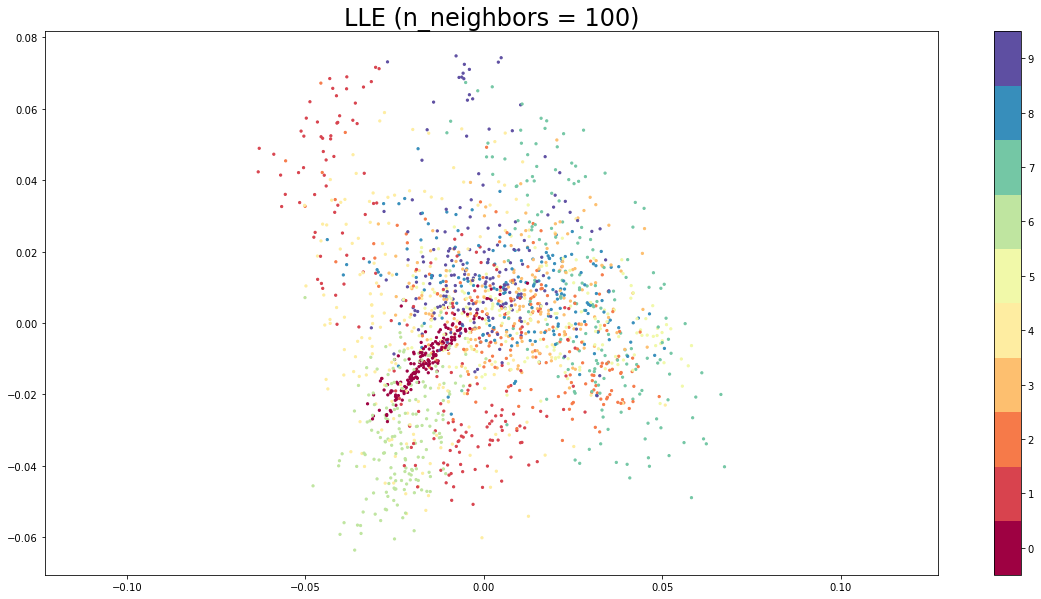

In [19]:
embedding_a = LocallyLinearEmbedding(n_neighbors=3)

digits_lle_a = embedding_a.fit_transform(X_digits)
# print("a:", digits_lle_a.shape)

disegna_2(digits_lle_a, y_digits, title="LLE (n_neighbors = 3)")
plt.show()

# -------------------------------------------------

embedding_b = LocallyLinearEmbedding(n_neighbors=10)

digits_lle_b = embedding_b.fit_transform(X_digits)
# print("b:", digits_lle_b.shape)

disegna_2(digits_lle_b, y_digits, title="LLE (n_neighbors = 10)")
plt.show()

# -------------------------------------------------

embedding_c = LocallyLinearEmbedding(n_neighbors=100)

digits_lle_c = embedding_c.fit_transform(X_digits)
# print("c:", digits_lle_c.shape)

disegna_2(digits_lle_c, y_digits, title="LLE (n_neighbors = 100)")
plt.show()

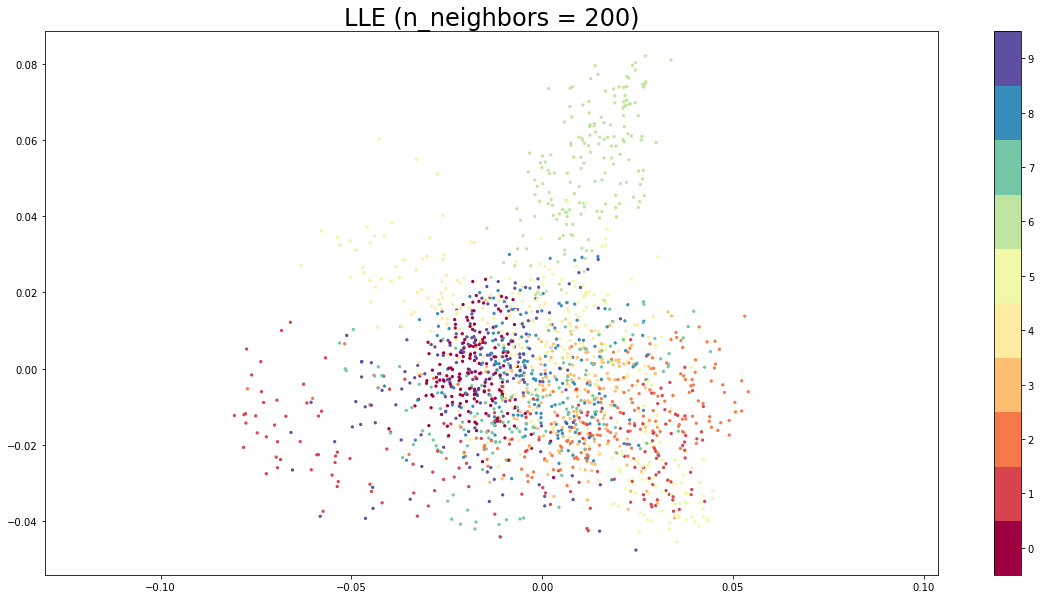

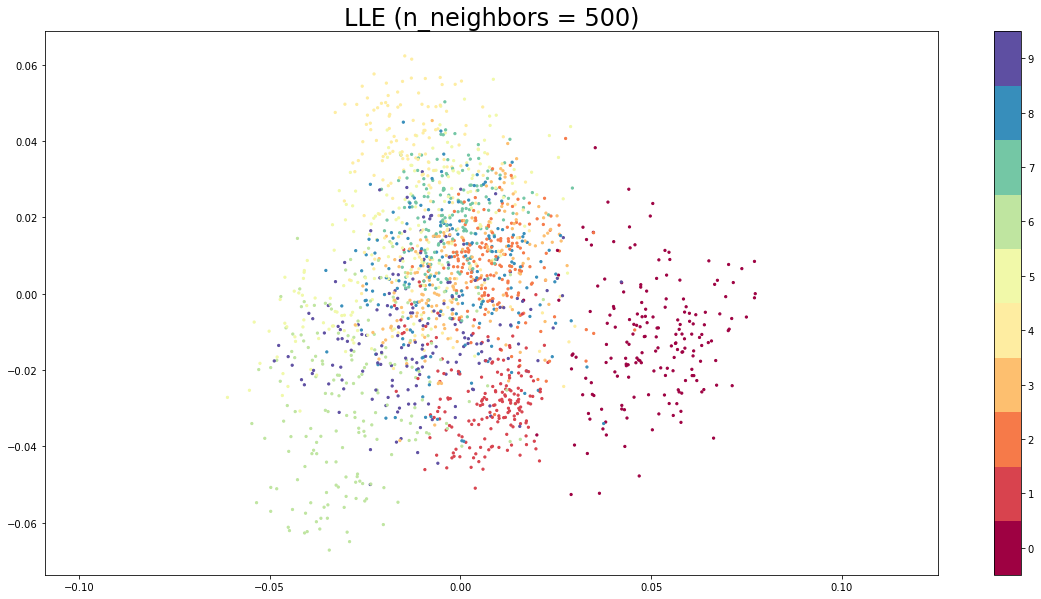

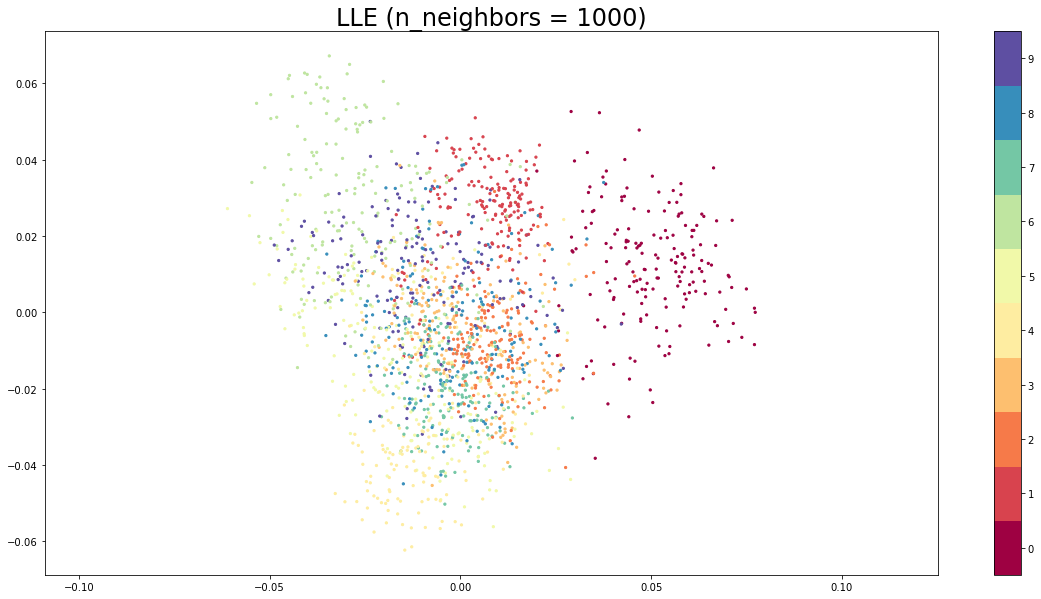

In [20]:
embedding_d = LocallyLinearEmbedding(n_neighbors=200)

digits_lle_d = embedding_d.fit_transform(X_digits)
# print("d:", digits_lle_d.shape)

disegna_2(digits_lle_d, y_digits, title="LLE (n_neighbors = 200)")
plt.show()

# -------------------------------------------------

embedding_d = LocallyLinearEmbedding(n_neighbors=500)

digits_lle_d = embedding_d.fit_transform(X_digits)
# print("d:", digits_lle_d.shape)

disegna_2(digits_lle_d, y_digits, title="LLE (n_neighbors = 500)")
plt.show()

# -------------------------------------------------

embedding_e = LocallyLinearEmbedding(n_neighbors=1000)

digits_lle_e = embedding_d.fit_transform(X_digits)
# print("e:", digits_lle_d.shape)

disegna_2(digits_lle_e, y_digits, title="LLE (n_neighbors = 1000)")
plt.show()

# -------------------------------------------------

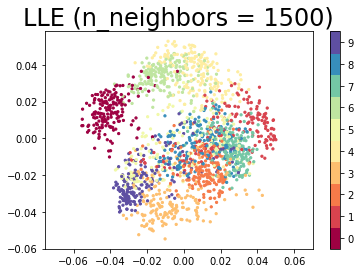

tempo:  148.04285979270935


In [7]:
import time
startTime = time.time()

embedding_f = LocallyLinearEmbedding(n_neighbors=1500)

digits_lle_f = embedding_f.fit_transform(X_digits)
# print("f:", digits_lle_d.shape)

disegna_2(digits_lle_f, y_digits, title="LLE (n_neighbors = 1500)")
plt.show()

tempo = time.time() - startTime
print("tempo: ", tempo)

# -------------------------------------------------

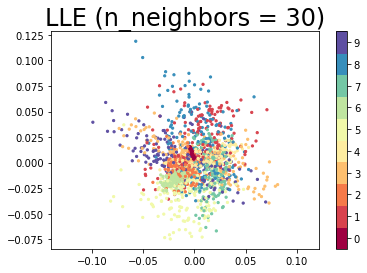

In [11]:
embedding_g = LocallyLinearEmbedding(n_neighbors=30)

digits_lle_g = embedding_g.fit_transform(X_digits)
# print("g:", digits_lle_d.shape)

disegna_2(digits_lle_g, y_digits, title="LLE (n_neighbors = 30)")
plt.show()

In [10]:
def elabora_lle(x):
    embedding = LocallyLinearEmbedding(n_neighbors=x)
    digits_lle = embedding.fit_transform(X_digits)
    
    titleee = "LLE (n_neighbors = " + str(x) + ")"
    disegna_2(digits_lle, y_digits, title=titleee)

In [11]:
interact(elabora_lle, x=widgets.IntSlider(min=5, max=1755, step=100, value=30))

interactive(children=(IntSlider(value=30, description='x', max=1755, min=5, step=100), Output()), _dom_classes…

<function __main__.elabora_lle(x)>

e: (1797, 3)


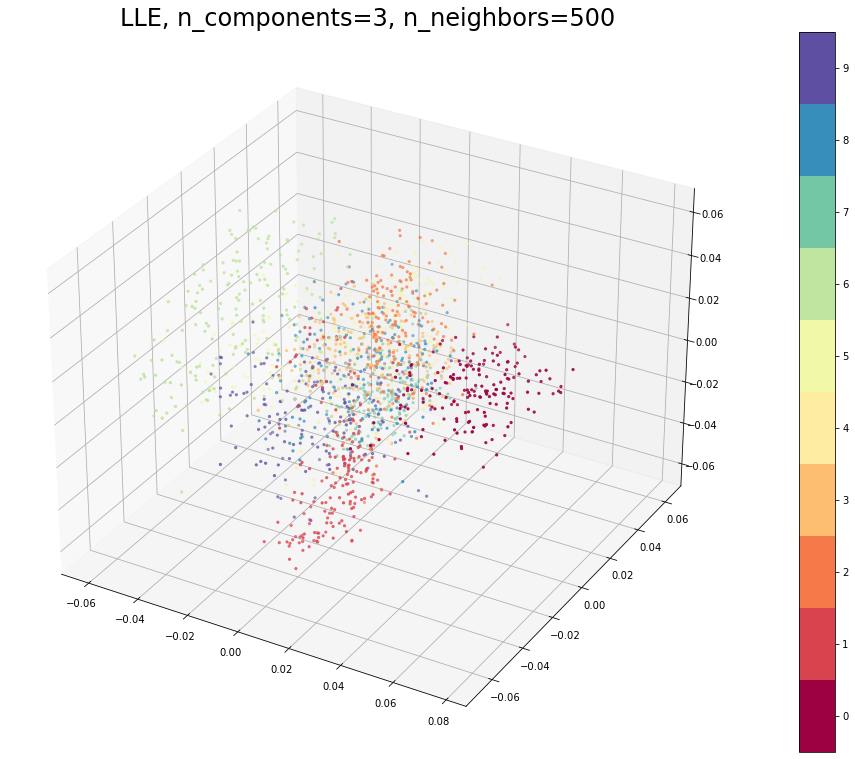

In [23]:
embedding_e = LocallyLinearEmbedding(n_neighbors=500, n_components=3)

digits_lle_e = embedding_e.fit_transform(X_digits)
print("e:", digits_lle_e.shape)

# -------------------------------------------------

fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(digits_lle_e[:, 0], digits_lle_e[:, 1], digits_lle_e[:, 2], c=y_digits, cmap='Spectral', s=5)

fig.colorbar(p, boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title("LLE, n_components=3, n_neighbors=500", fontsize=24)
plt.show()

Locally Linear Embedding
(Roweis & Saul, 2000) 
LLE is a nonlinear dimensionality reduction method, which can be used for manifold embedding and feature extraction.
LLE tries to preserve the local structure of data in the embedding space. 
In other words, the close points in the high-dimensional input space should also be close to each other in the low-dimensional embedding space.
By this local fitting, hopefully the far points in the input space also fall far away from each other in the embedding space.

![caption](files/fig_1.png)

figura #1: Piece-wise local unfolding of manifold by LLE (in this example from two dimensions to one intrinsic dimension).

3 steps:
 1. it finds k-Nearest Neighbors (kNN) graph of all training points
     (k-nearest neighbors)
 2. find weights for reconstructing every point by its neighbors, using linear combination
     (linear reconstruction by the neighbors)
 3. Using the same found weights, it embeds every point by a linear combination of its embedded neighbors
     (linear embedding)

The main idea of LLE is using the same reconstruction weights in the lower dimensional embedding space as in the high dimensional input space.

$$ COSE FICHISSIME IN LATEX $$

![caption](files/fig_2.png)

We denote the $ n $ data points in the input and feature spaces by $ \{ x_i \in \mathbb R^d \}^n_{i=1} $ and $ \{ y_i \in \mathbb R^p \}^n_{i=1} $ , respectively, where we usually have $ p << d $

1 - k-Nearest Neighbors

A kNN graph is formed using pairwise Euclidean distance between the data points. Therefore, every data point has $ k $ neighbors.

Indichiamo con $ \large x_{ij} \in \mathbb R^d $ il j-esimo vicino di $ \large x_i $ otteniamo quindi la seguente matrice <br>
$$ \large \mathbb R^{d \times k} \ni \mathbf X_i := [ x_{i1}, \dots, x_{ik} ] $$
che include the k neighbors of xi


2- linear reconstruction by the neighbors

Nel secondo step, dobbiamo trovare i pesi per la linear reconstruction di ogni punto a partire dai suoi kNN. <br>
Vogliamo esprimere $ x_i $ come somma pesata dei suoi $ k $ vicini

$$
\large x_i \approx \sum_{j = 1}^{k}w_{ij}x_j
$$

i pesi $ w_{ij} $ devono soddisfare la condizione

$$
\large \sum_{j = 1}^{k}w_{ij} = 1, \quad \forall i \in {1, \dots, n}
$$

nota che 

$$
\large \mathbf w_i = \begin{bmatrix} w_{i1} \\ \vdots \\ w_{ik} \end{bmatrix}
$$


dobbiamo ora minimizzare:

$$
\large \textrm{minimize: }\quad \left\| x_i - \sum_{j = 1}^{k}w_{ij}x_j \right\|^2
=
\left\| x_i - \mathbf X_i \mathbf w_i \right\|^2
$$

( in pratica indichiamo xi come prodotto tra i vicini e i relativi pesi)

dopo alcuni passaggi si arriva finalmente a

$$
\large \mathbf w_i = \dfrac{\mathbf G_i^{-1}\mathbf 1}{\mathbf 1^\top \mathbf G_i^{-1}\mathbf 1}
$$

, dove $ \large \mathbf G_i $ è una matrice di Gram (simmetrica reale) nello spazio $ \large \mathbb R^{k \times k} $ ottenuta eseguendo operazioni con $ \large x_i $ , $ \mathbf 1^\top $ e $ \mathbf X_i $

abbiamo quindi trovato i pesi associati a ogni punto per effettuare la linear reconstruction

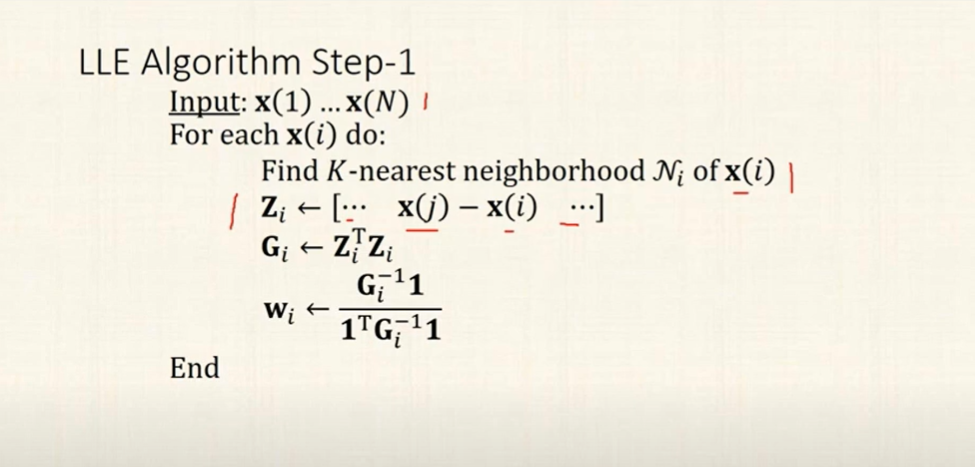

in sintesi, possiamo riassumere quello che abbiamo fatto fin ora in questo modo:

- abbiamo in input i nostri $ n $ punti
- per ogni $ x_i $ :
  - troviamo i k nearest neighbor di $ x_i $
  - $ \mathbf Z_i \leftarrow \begin{bmatrix} \dots \quad x_j - x_i \quad \dots \end{bmatrix} $
  ( prendo tutti i nearest neighbors di x_i e sottraggo x_i a ognuno di loro )
  - $ \mathbf G_i \leftarrow \mathbf Z_i^\top Z_i$
  ( ottengo la local Gram matrix )
  - $ \mathbf w_i = \dfrac{\mathbf G_i^{-1}\mathbf 1}{\mathbf 1^\top \mathbf G_i^{-1}\mathbf 1} $
  
  

Il vincolo impone alla somma dei pesi per ogni punto di essere uguale a uno e 
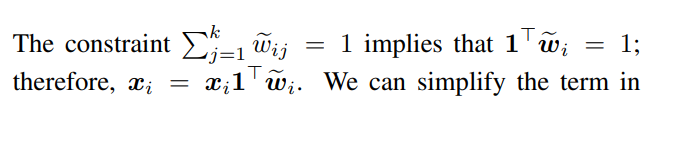
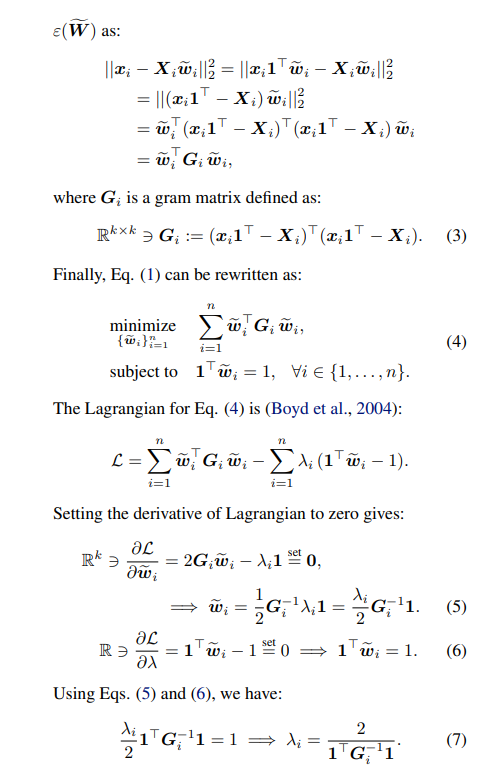
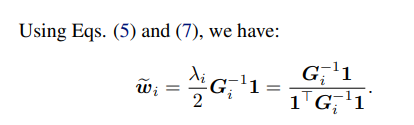

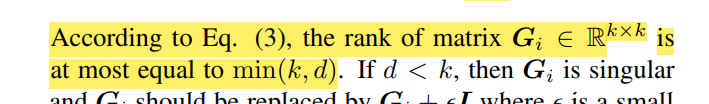

3 - linear embedding

Nel secondo step abiamo trovato i pesi per la linear reconstruction nell'alto spazio dimensionale in input. Adesso "embeddiamo" i dati in uno spazio dimensionale più piccolo usando gli stessi pesi dello spazio di input.
Questa operazione di linear embedding può essere formulata così:
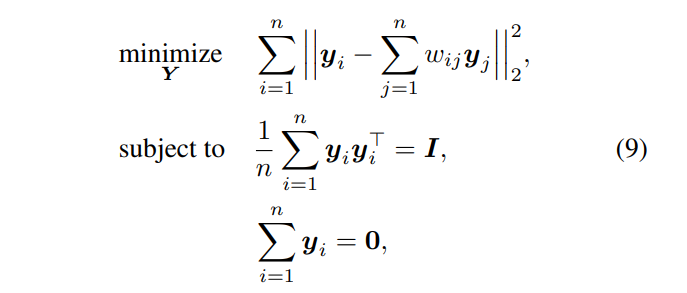

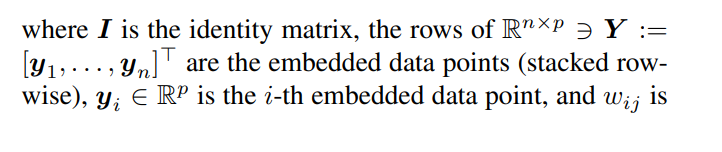
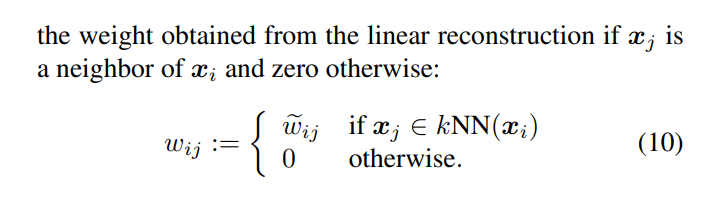

il secondo vincolo (equazione 9) "assicura" la media = 0 dei dati embedded

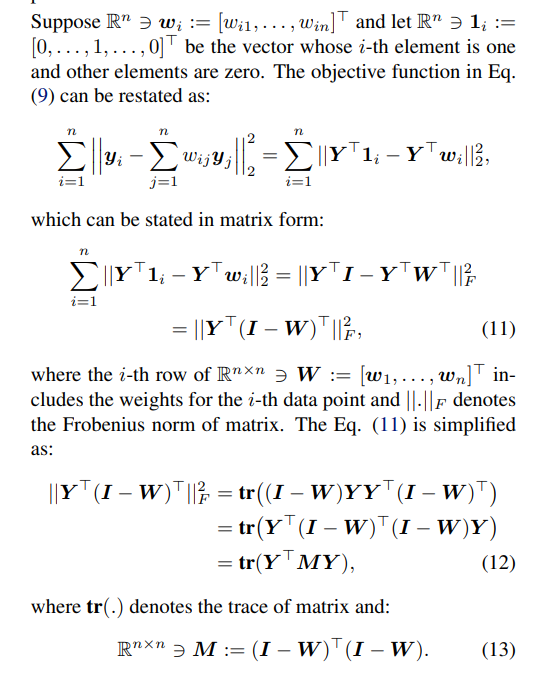

nota: trace = somma degli elementi sulla diagonale

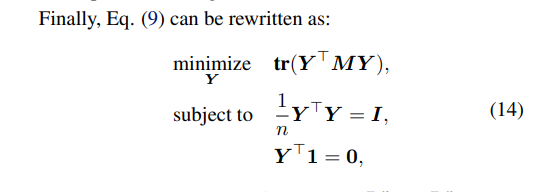

Ignorando il secondo vincolo, che si "satisfy" implicitamente, otteniamo la Lagrangian per l'equazione #14
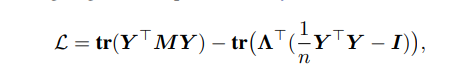
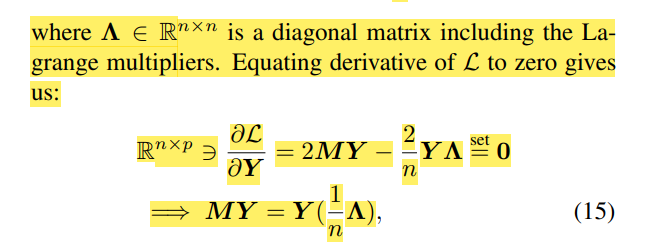

which is the eigenvalue problem for M (Ghojogh et al.,
2019b). Therefore, the columns of Y are the eigenvectors of M where eigenvalues are the diagonal elements of
(1/n)Λ

Dato che l'eq #14 è un problema di minimizzazione, le colonne di Y dovranno essere ordinate dal più piccolo autovalore al più grande.
Dopo aver ordinato gli autovettori in base al relatvo autovalore, ignoriamo il primo dato che "having zero eigenvalue" e prendiamo i "p" più piccoli autovettori di M con gli autovalori diversi da zero come colonne di Y in R^nxp